In [1]:
%matplotlib inline

In [24]:
import pylab as pl

In [2]:
import numpy as np
from astropy import units as u

In [3]:
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')

In [7]:
import os
os.chdir("/lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/")

In [51]:
from astropy import visualization
asinh = visualization.ImageNormalize(stretch=visualization.AsinhStretch())

In [5]:
import casatools

In [79]:
ms = casatools.ms()

In [80]:
ms.open('W51-E_B6_uid___A001_X1296_X215_continuum_merged_selfcal.ms')

True

In [81]:
meta = ms.metadata()

In [83]:
mdsummary = meta.summary()

In [108]:
oids = [int(x.split("=")[1]) for x in mdsummary.keys() if 'observationID' in x]
print(oids)

[0, 1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9]


In [122]:
okfields = np.where(mdsummary['fields'] == 'W51-E')[0]
print(okfields)

[ 3  4  5  6  7  8  9 10 11 12 13 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [120]:
[len(mdsummary[f'observationID={obsid}']['arrayID=0']) for obsid in oids]

[35, 35, 28, 28, 19, 22, 22, 19, 28, 28, 28, 28, 28]

In [142]:
okantenna = set([int(aid) for aid, sz in meta.antennadiameter().items() if sz['value'] == 12])

In [131]:
mdsummary['observationID=1']['arrayID=0']['scan=38']['antennas']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [143]:
ddids = [mdsummary[f'observationID={obsid}']['arrayID=0'][scanid][f'fieldID={fid}']['0']['data description IDs']
         for obsid in oids
         for scanid in mdsummary[f'observationID={obsid}']['arrayID=0'].keys()
         for fid in okfields 
         if ((f'fieldID={fid}' in mdsummary[f'observationID={obsid}']['arrayID=0'][scanid])
        and (set(mdsummary[f'observationID={obsid}']['arrayID=0'][scanid]['antennas']).issubset(okantenna)))]

In [144]:
np.unique(ddids)

array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  96,  97,  98,  99, 100, 101, 102, 103], dtype=int32)

In [13]:
summary = ms.summary()

In [15]:
nscans = len(['scan' in x for x in summary])
print(f"Found {nscans} scans")

Found 397 scans


In [206]:
ms.selectinit(datadescid=16)
ms.select({'field_id':okfields})
data = ms.getdata(["amplitude", "corrected_amplitude", "model_amplitude", "axis_info"],ifraxis=True)

In [207]:
shape = data['amplitude'].shape
print(f"data shape={shape}")

data shape=(2, 2, 990, 486)


In [208]:
{x: len(data['axis_info'][x]) for x in data['axis_info']}

{'corr_axis': 2, 'freq_axis': 2, 'ifr_axis': 4, 'time_axis': 1}

In [209]:
len(data['axis_info']['time_axis']['MJDseconds'])

486

In [210]:
baseline_lengths = data['axis_info']['ifr_axis']['baseline']
bll_sorter = np.argsort(baseline_lengths)
bll_sorter = bll_sorter[baseline_lengths[bll_sorter]>0]

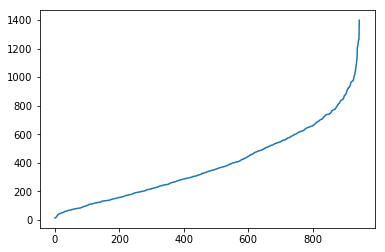

In [212]:
pl.plot(baseline_lengths[bll_sorter])

In [200]:
import copy

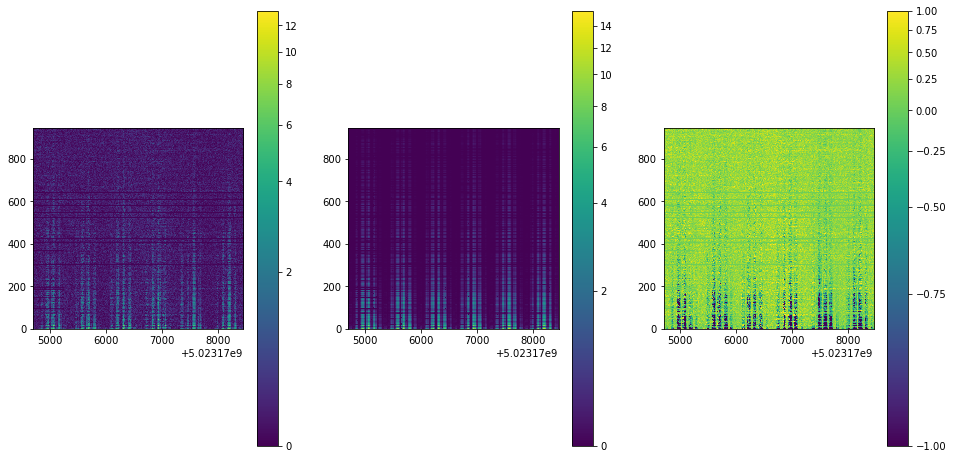

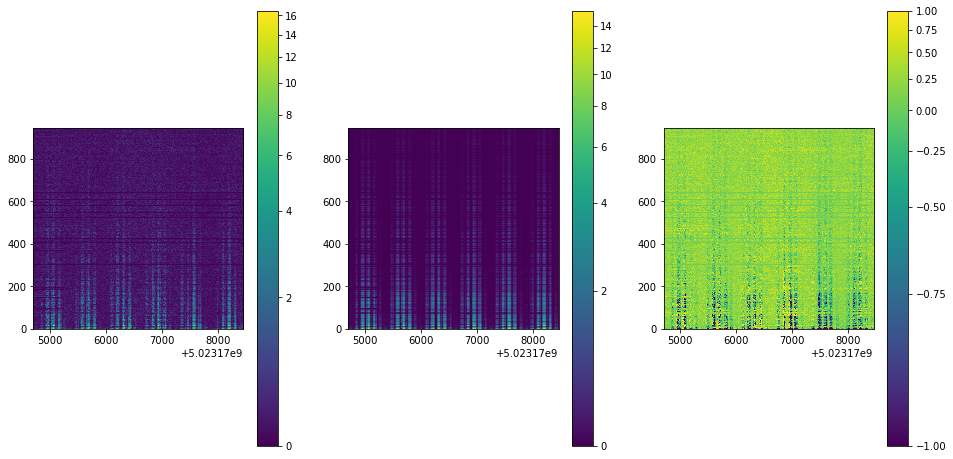

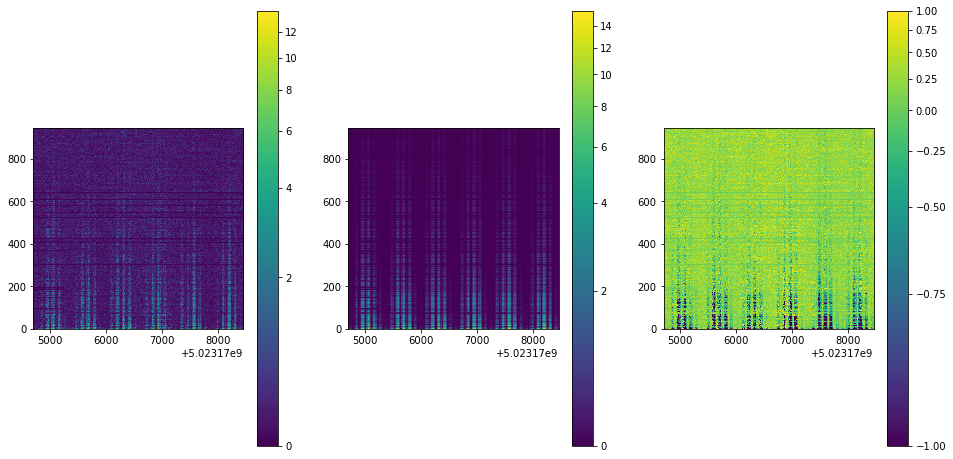

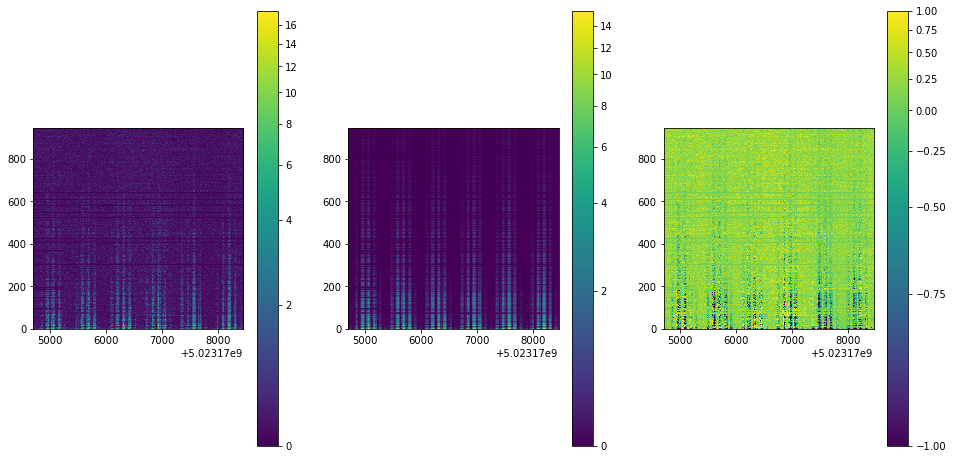

In [204]:
for polid in range(shape[0]):
    for frqid in range(shape[1]):

        fig = pl.figure(figsize=(16,8))

        ax1 = pl.subplot(1,3,1)

        start = data['axis_info']['time_axis']['MJDseconds'].min()
        end = data['axis_info']['time_axis']['MJDseconds'].max()
        im = ax1.imshow(data['amplitude'][polid,frqid,bll_sorter,:], origin='lower',
                  extent=[start, end, 0, len(bll_sorter)],
                  norm=copy.copy(asinh),
                  vmin=0, vmax=data['amplitude'][polid,frqid,bll_sorter,:].max()
                 )
        ax1.set_aspect((end-start)/shape[2])
        fig.colorbar(im, ax=ax1)

        ax2 = pl.subplot(1,3,2)
        im2 = ax2.imshow(data['model_amplitude'][polid,frqid,bll_sorter,:], origin='lower',
                  extent=[start, end, 0, len(bll_sorter)],
                  norm=copy.copy(asinh),
                  vmin=0, vmax=data['model_amplitude'][polid,frqid,bll_sorter,:].max()
                 )
        ax2.set_aspect((end-start)/shape[2])
        fig.colorbar(im2, ax=ax2)


        ax3 = pl.subplot(1,3,3)
        im3 = ax3.imshow(data['amplitude'][polid,frqid,bll_sorter,:] - data['model_amplitude'][polid,frqid,bll_sorter,:],
                         origin='lower',
                         extent=[start, end, 0, len(bll_sorter)],
                         norm=copy.copy(asinh),
                         vmin=-1, vmax=1,
                        )
        ax3.set_aspect((end-start)/shape[2])
        fig.colorbar(im3, ax=ax3)

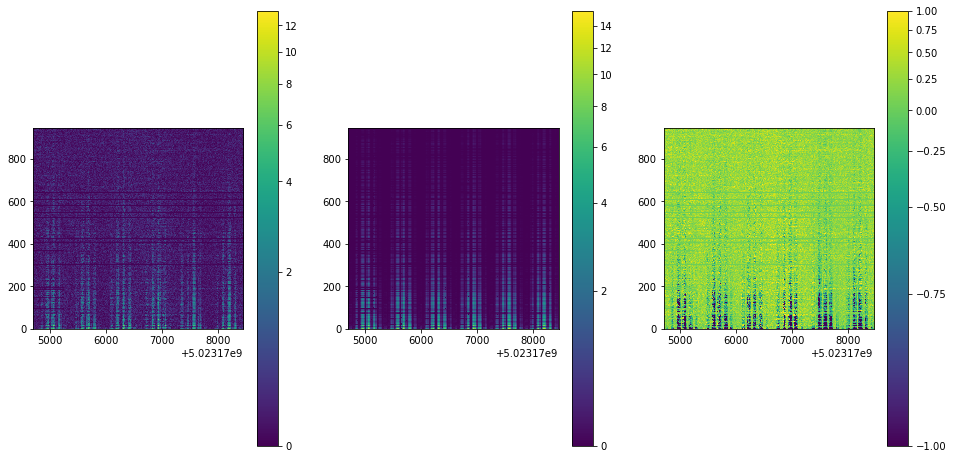

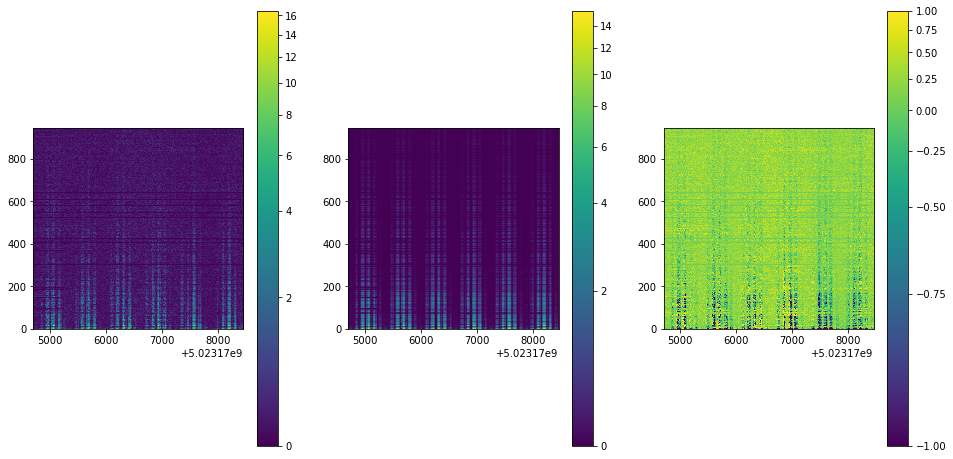

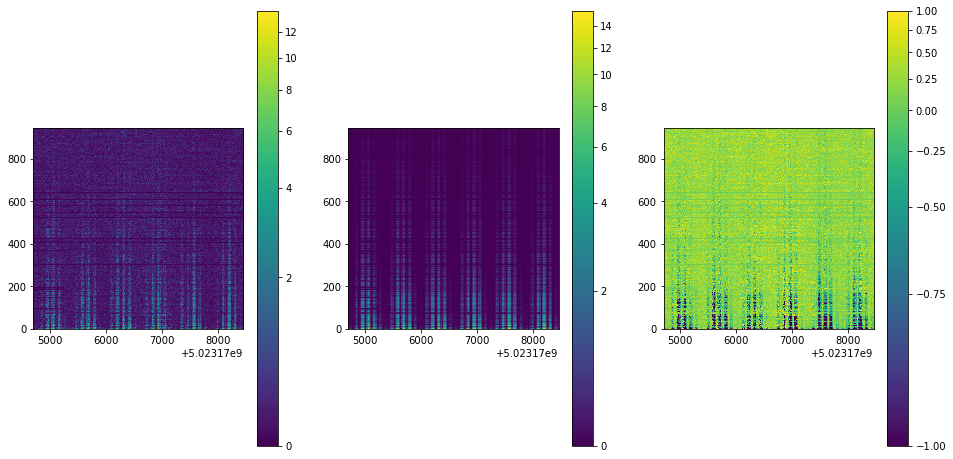

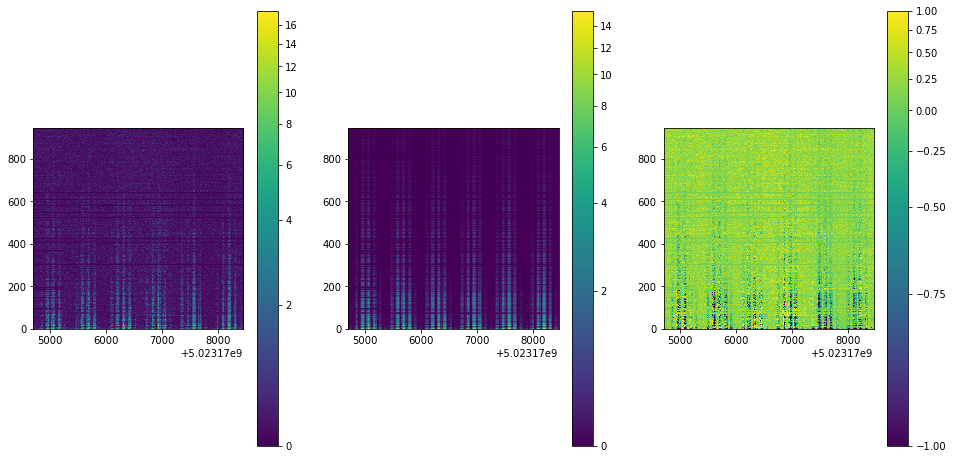

In [211]:
for polid in range(shape[0]):
    for frqid in range(shape[1]):

        fig = pl.figure(figsize=(16,8))

        ax1 = pl.subplot(1,3,1)

        start = data['axis_info']['time_axis']['MJDseconds'].min()
        end = data['axis_info']['time_axis']['MJDseconds'].max()
        im = ax1.imshow(data['corrected_amplitude'][polid,frqid,bll_sorter,:], origin='lower',
                  extent=[start, end, 0, len(bll_sorter)],
                  norm=copy.copy(asinh),
                  vmin=0, vmax=data['corrected_amplitude'][polid,frqid,bll_sorter,:].max()
                 )
        ax1.set_aspect((end-start)/shape[2])
        fig.colorbar(im, ax=ax1)

        ax2 = pl.subplot(1,3,2)
        im2 = ax2.imshow(data['model_amplitude'][polid,frqid,bll_sorter,:], origin='lower',
                  extent=[start, end, 0, len(bll_sorter)],
                  norm=copy.copy(asinh),
                  vmin=0, vmax=data['model_amplitude'][polid,frqid,bll_sorter,:].max()
                 )
        ax2.set_aspect((end-start)/shape[2])
        fig.colorbar(im2, ax=ax2)


        ax3 = pl.subplot(1,3,3)
        im3 = ax3.imshow(data['corrected_amplitude'][polid,frqid,bll_sorter,:] - data['model_amplitude'][polid,frqid,bll_sorter,:],
                         origin='lower',
                         extent=[start, end, 0, len(bll_sorter)],
                         norm=copy.copy(asinh),
                         vmin=-1, vmax=1,
                        )
        ax3.set_aspect((end-start)/shape[2])
        fig.colorbar(im3, ax=ax3)
